In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
data = "Nigeria_Covid_June_23.csv"
df = pd.read_csv(data)
df.head()

,States,Confirmed Cases,Discharged Cases,Total Deaths,Active Cases,Samples Tested
0,Lagos,9073,1457,126,7490,34734
1,FCT,1605,497,30,1078,14794
2,Kano,1190,744,51,395,10232
3,Oyo,1055,291,9,755,7605
4,Rivers,930,440,35,455,3039


In [4]:
df['Percent Death'] = (df['Total Deaths']/df['Confirmed Cases'])*100
df['Percent Active from Test'] = (df['Active Cases']/df['Samples Tested'])*100
df['Percent Discharged'] = (df['Discharged Cases']/df['Confirmed Cases'])*100
df['Percent Confirmed'] = (df['Confirmed Cases']/df['Samples Tested'])*100
df.head()

,States,Confirmed Cases,Discharged Cases,Total Deaths,Active Cases,Samples Tested,Percent Death,Percent Active from Test,Percent Discharged,Percent Confirmed
0,Lagos,9073,1457,126,7490,34734,1.388736,21.563886,16.058636,26.121380
1,FCT,1605,497,30,1078,14794,1.869159,7.286738,30.965732,10.848993
2,Kano,1190,744,51,395,10232,4.285714,3.860438,62.521008,11.630180
3,Oyo,1055,291,9,755,7605,0.853081,9.927679,27.582938,13.872452
4,Rivers,930,440,35,455,3039,3.763441,14.972030,47.311828,30.602172


In [5]:
#Group the data by categories

Total_cases = df.groupby("States")['Confirmed Cases'].mean()
Total_cases_20 = Total_cases.nlargest(20, keep='first')
Total_cases_l10 = Total_cases.nsmallest(10, keep='first')

Total_percent_death = df.groupby(["States", "Samples Tested"],as_index=False)['Percent Death'].mean()
Total_percent_death_20 = Total_percent_death.nlargest(20, columns = 'Percent Death')
Total_percent_death_l10 = Total_percent_death.nsmallest(10, columns='Percent Death')

Total_tested = df.groupby("States")['Samples Tested'].mean()
Total_tested_20 = Total_tested.nlargest(20, keep='first')
Total_tested_l10 = Total_tested.nsmallest(10, keep='first')

Total_percent_confirmed = df.groupby("States")['Percent Confirmed'].mean()
Total_percent_confirmed_20 = Total_percent_confirmed.nlargest(20, keep='first')
Total_percent_confirmed_l10 = Total_percent_confirmed.nsmallest(10, keep='first')

Total_percent_discharged = df.groupby("States")['Percent Discharged'].mean()
Total_percent_discharged_20 = Total_percent_discharged.nlargest(20, keep='first')
Total_percent_discharged_l10 = Total_percent_discharged.nsmallest(10, keep='first')

In [6]:
Total_percent_death_l10

,States,Samples Tested,Percent Death
22,Kogi,5,0.000000
34,Taraba,364,0.000000
10,Ebonyi,2120,0.378788
30,Oyo,7605,0.853081
0,Abia,852,1.190476
16,Imo,1069,1.219512
24,Lagos,34734,1.388736
18,Kaduna,5058,1.644737
14,FCT,14794,1.869159
17,Jigawa,2696,1.892744


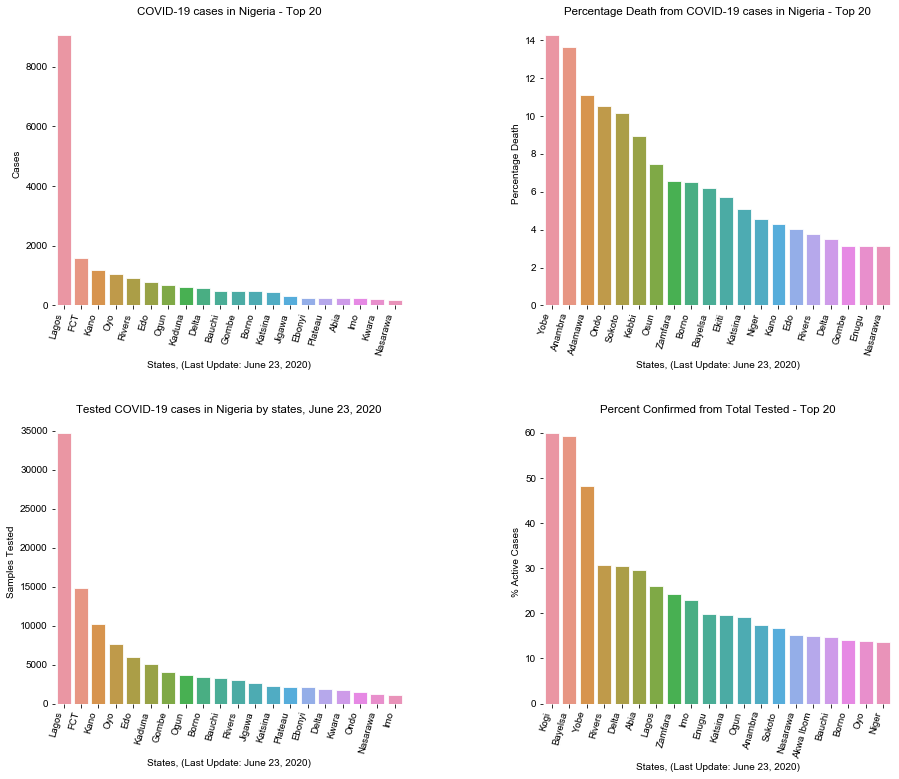

In [7]:
fig, axs = plt.subplots(figsize=(15,12), ncols=2, nrows=2)
sns.set(style='whitegrid', rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)


sns.barplot(x = Total_cases_20.axes[0], y = Total_cases_20,  ax=axs[0][0]).set(title="COVID-19 cases in Nigeria - Top 20", ylabel="Cases")
sns.barplot(x = Total_percent_death_20['States'], y = Total_percent_death_20['Percent Death'], ax=axs[0][1]).set(title="Percentage Death from COVID-19 cases in Nigeria - Top 20", ylabel="Percentage Death", xlabel="States and Samples Tested")
sns.barplot(x = Total_tested_20.axes[0], y = Total_tested_20, ax=axs[1][0]).set(title="Tested COVID-19 cases in Nigeria by states, June 23, 2020", ylabel="Samples Tested")
sns.barplot(x = Total_percent_confirmed_20.axes[0], y = Total_percent_confirmed_20, ax=axs[1][1]).set(title="Percent Confirmed from Total Tested - Top 20", ylabel="% Active Cases")

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.4, wspace=0.4)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_xlabel("States, (Last Update: June 23, 2020)")
    
sns.despine(left=True, bottom=True)                                                   
plt.savefig('01-COVID_19 Cases Nigeria, June 23 2020.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

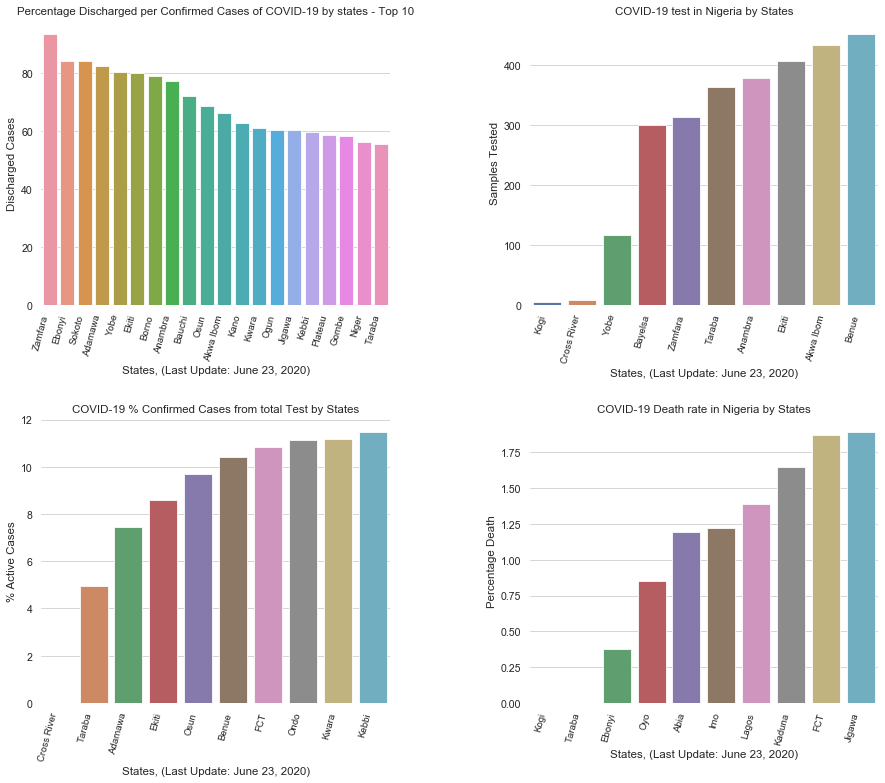

In [10]:
fig, axs = plt.subplots(figsize=(15,12), ncols=2, nrows=2)
sns.set(style='whitegrid', rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)


sns.barplot(x = Total_percent_discharged_20.axes[0], y = Total_percent_discharged_20, ax=axs[0][0]).set(title="Percentage Discharged per Confirmed Cases of COVID-19 by states - Top 10", ylabel="Discharged Cases")
sns.barplot(x = Total_tested_l10.axes[0], y = Total_tested_l10 ,ax=axs[0][1]).set(title="COVID-19 test in Nigeria by States", ylabel="Samples Tested")
sns.barplot(x = Total_percent_confirmed_l10.axes[0], y = Total_percent_confirmed_l10, ax=axs[1][0]).set(title="COVID-19 % Confirmed Cases from total Test by States", ylabel="% Active Cases")
sns.barplot(x = Total_percent_death_l10['States'], y = Total_percent_death_l10['Percent Death'], ax=axs[1][1]).set(title="COVID-19 Death rate in Nigeria by States", ylabel="Percentage Death")

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.4, wspace=0.4)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_xlabel("States, (Last Update: June 23, 2020)")
    
sns.despine(left=True, bottom=True)                                                   
plt.savefig('02-COVID_19 Cases Nigeria, June 23 2020.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

In [11]:
Total_most_tested = df.groupby(["States", "Percent Death", "Percent Active from Test","Percent Discharged", "Percent Confirmed"],as_index=False)['Samples Tested'].mean()
Total_most_tested = Total_most_tested.nlargest(10, columns='Samples Tested')
Least_Percent_Death = Total_most_tested.nsmallest(10, columns='Percent Death')
Least_Percent_Active = Total_most_tested.nsmallest(10, columns='Percent Active from Test')
Top_Discharged = Total_most_tested.nlargest(10, columns='Percent Discharged')
Least_Percent_Confirmed = Total_most_tested.nsmallest(10, columns='Percent Confirmed')

In [12]:
Total_most_tested.head()

,States,Percent Death,Percent Active from Test,Percent Discharged,Percent Confirmed,Samples Tested
23,Lagos,1.388736,21.563886,16.058636,26.121380,34734
13,FCT,1.869159,7.286738,30.965732,10.848993,14794
18,Kano,4.285714,3.860438,62.521008,11.630180,10232
29,Oyo,0.853081,9.927679,27.582938,13.872452,7605
10,Edo,4.015056,8.751048,30.489335,13.361274,5965


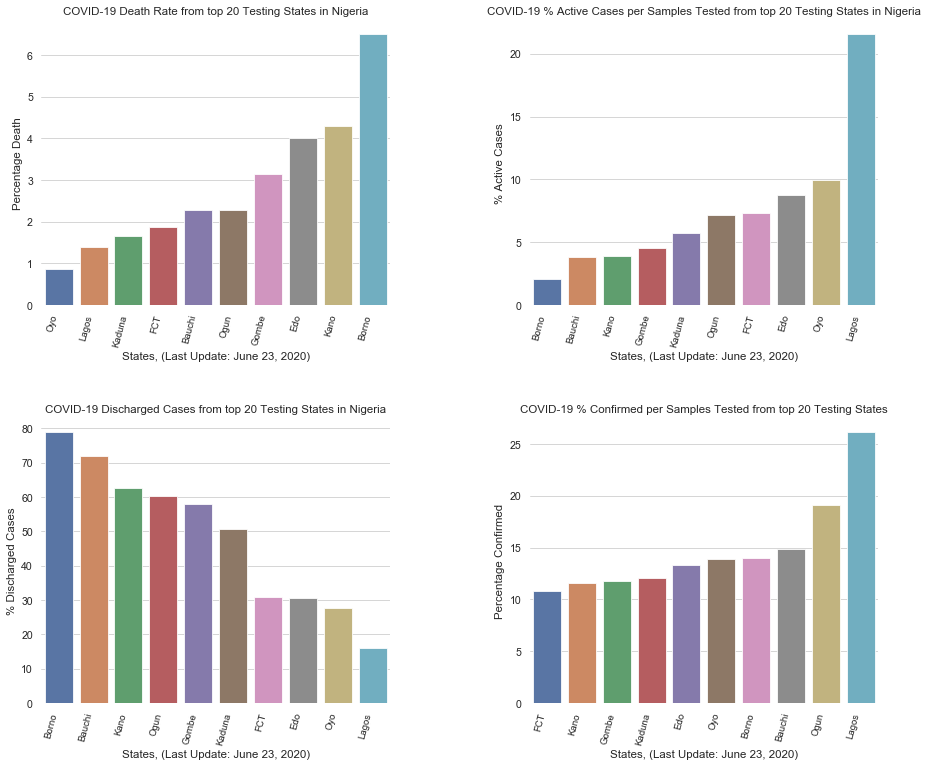

In [13]:
fig, axs = plt.subplots(figsize=(15,12), ncols=2, nrows=2)
sns.set(style='whitegrid', rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)


sns.barplot(x = Least_Percent_Death['States'], y = Least_Percent_Death['Percent Death'], ax=axs[0][0]).set(title="COVID-19 Death Rate from top 20 Testing States in Nigeria", ylabel="Percentage Death")
sns.barplot(x = Least_Percent_Active['States'], y = Least_Percent_Active['Percent Active from Test'],ax=axs[0][1]).set(title="COVID-19 % Active Cases per Samples Tested from top 20 Testing States in Nigeria", ylabel="% Active Cases")
sns.barplot(x = Top_Discharged['States'], y = Top_Discharged['Percent Discharged'], ax=axs[1][0]).set(title="COVID-19 Discharged Cases from top 20 Testing States in Nigeria", ylabel="% Discharged Cases")
sns.barplot(x = Least_Percent_Confirmed['States'], y = Least_Percent_Confirmed['Percent Confirmed'], ax=axs[1][1]).set(title="COVID-19 % Confirmed per Samples Tested from top 20 Testing States", ylabel="Percentage Confirmed")

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.4, wspace=0.4)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_xlabel("States, (Last Update: June 23, 2020)")
    
sns.despine(left=True, bottom=True)                                                   
plt.savefig('03-COVID_19 Cases Nigeria, June 23 2020.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc